In [ ]:
## 라이브러리 설정
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 각각의 플랫폼에 따른 폰트 설정을 위해서
import platform     ## 플랫폼관련 라이브러리
if platform.system() == "Windows":
    path = "c:\Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else:
    print('check your OS system') 

In [ ]:
### chromedriver 실행
from selenium import webdriver
import time

driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")

## 인스타그램 접속하기
driver.get("http://www.instargram.com")
time.sleep(4)

USER = "dongseon0713"
PASS = "ehdtjs5001!"

id = driver.find_element_by_css_selector("#loginForm > div > div:nth-child(1) > div > label > input")
id.clear()
id.send_keys(USER)
time.sleep(2)

passwd = driver.find_element_by_css_selector("#loginForm > div > div:nth-child(2) > div > label > input")
passwd.clear()
passwd.send_keys(PASS)
passwd.submit()
time.sleep(3)

driver.find_element_by_css_selector("#react-root > section > main > div > div > div > div > button").click()
time.sleep(3)
driver.find_element_by_css_selector("body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC > button.aOOlW.HoLwm").click()
time.sleep(3)
#driver.find_element_by_css_selector("#loginForm > div > div:nth-child(3)").click()

In [ ]:
### 인스타그램의 검색 결과 url을 반환하는 함수
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url

word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

In [ ]:
### 첫번째 게시물을 찾아 클릭
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(4)
    
select_first(driver)

In [ ]:
### 게시글 정보 가져오기
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")


    ### 본문내용 가져오기
    try:
        content = soup.select("div.C4VMK > div > span")[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
        
    ### 본문 내용에서 해시태그 가져오기(정규표현식 사용)
    tags = re.findall(r"#[^\s#,\\]+", content)

    ### 작성일자 정보 가져오기
    date = soup.select("time.FH9sR.RhOlS")[0]['datetime'][:10]

    ### 좋아요 수 가져오기
    try:
        like = soup.select("div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll > span")[0].text
    except:
        like = 0
        
    ### 위치정보 가져오기
    try:
        place = soup.select("a.O4GlU")[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
        
    data = [content, date, like, place, tags]
    
    return data

get_content(driver)

In [ ]:
### 다음 게시글 열기
def move_next(driver):
    right = driver.find_element_by_css_selector("div.l8mY4.feth3 > button")
    right.click()
    time.sleep(4)
    
move_next(driver)

In [ ]:
### 여러개 개시글 정보 수집하기 순서
## 1. 크롬브라우저 열기
## 2. 인스타그램 검색 페이지 url 정보 만들기 : insta_searching()
## 3. 검색페이지 접속하기
## 4. 첫번째 게시물 클릭하기
## 5. 비어있는 변수(result) 만들기
## 6. 게시글 정보 가져오기 : get_content
## 7. 게시글 정보를 변수(result)에 추가하기
## 8. 다음 게시글 선택하기 : move_next()
## 9. 게시글은 50개 정도 크롤링 후 저장 -> 수집 완료
## 10. 수집 데이터 저장(1_crawling_jeudoMatJip.xlsx)

In [ ]:
### chromedriver 실행
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

word = "제주맛집"
url = insta_searching(word)
driver.get(url)

time.sleep(7)

select_first(driver)
target = 50
results = []
for i in range(target):
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        results.append(get_content(driver))
        time.sleep(3)
        move_next(driver)
    except:
        time.sleep(6)
        move_next(driver)

results

In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.to_excel("data_insta/1_crawling_jejuMatjip.xlsx",index=False)


In [ ]:
#### "제주맛집"이외에 "제주도맛집","제주여행","제주관광"
## 제주도맛집
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

time.sleep(7)

select_first(driver)
target = 50
results = []
for i in range(target):
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        results.append(get_content(driver))
        time.sleep(3)
        move_next(driver)
    except:
        time.sleep(6)
        move_next(driver)
        
results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.to_excel("data_insta/1_crawling_jejudoMatjip.xlsx",index=False)

In [ ]:
### 제주여행
word = "제주여행"
url = insta_searching(word)
driver.get(url)

time.sleep(7)

select_first(driver)
target = 50
results = []
for i in range(target):
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        results.append(get_content(driver))
        move_next(driver)
    except:
        time.sleep(6)
        move_next(driver)
        
results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.to_excel("data_insta/1_crawling_jejuYeoHang.xlsx",index=False)

In [ ]:
### 제주관광
word = "제주관광"
url = insta_searching(word)
driver.get(url)

time.sleep(7)

select_first(driver)
target = 50
results = []
for i in range(target):
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        results.append(get_content(driver))
        move_next(driver)
    except:
        time.sleep(6)
        move_next(driver)
        
results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.to_excel("data_insta/1_crawling_jejuKwanKwang.xlsx",index=False)

In [ ]:
#### 여러 개의 저장파일을 통합 (jeju_insta_df)
excel_names = ['data_insta/1_crawling_jejudoMatjip.xlsx','data_insta/1_crawling_jejuMatjip.xlsx','data_insta/1_crawling_jejuYeoHang.xlsx','data_insta/1_crawling_jejuKwanKwang.xlsx']
jeju_insta_df = pd.DataFrame()
for name in excel_names:
    pd_df = pd.read_excel(name)
    jeju_insta_df = jeju_insta_df.append(pd_df)
    
jeju_insta_df.head()
jeju_insta_df.drop_duplicates(subset=['content'],inplace=True)
jeju_insta_df.to_excel("data_insta/1_crawling_raw.xlsx",index=False)

In [ ]:
#### 워드 클라우드
### 수집한 데이터 중에 해시태그 정보들을 클라우드로 시각화
### 워드 클라우드는 텍스트 내에 출현하는 단어들의 출현 빈도수에 비례하여 크기로 표출한 그래프


In [ ]:
###### 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel("data_insta/1_crawling_raw.xlsx")
raw_total['tags'][:5]

In [ ]:
### 해시태그 통합 저장하기
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")        ## [2:-2] 앞뒤 괄호와 쉼표를 짜르고 실행
    for tag in tags_list:
        tags_total.append(tag)
raw_total['tags'][0]        ## type = str
raw_total['tags'][0][2:-2].split("', '")        ## ,를 기준으로 나눠주는 작업 (type = list)
        

In [ ]:
### 해시태그 빈도수 집계
from collections import Counter     ### Counter()함수는 그룹내 원소의 종류별로 빈도수
tag_counts = Counter(tags_total)

In [ ]:
tag_counts.most_common(150)      ## most_common(n) 가장 많은 카운트를 내림차순으로 n개 보여줌

In [ ]:
## 데이터 정제
## 불필요한 데이터 빼기 (#제주도, #제주, "", #jeju, #선팔맞팔, #제주맘, #일상, #좋아요, #소통, "맞팔", #daily ,#데일리)
STOPWORD = ['#제주도','#제주',"","#jeju","#선팔맞팔","#제주맘","#일상","#먹스타맞팔","#좋아요","#키니샵","#먹스타그램맞팔","#소통","#daily","#데일리"]

tags_total_selected = []
for tag in tags_total:
    if tag not in STOPWORD:
        tags_total_selected.append(tag)
tag_counts_selected = Counter(tags_total_selected)
tag_counts_selected.most_common(50)

In [ ]:
## 라이브러리 설정
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 각각의 플랫폼에 따른 폰트 설정을 위해서
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = AppleGothic

rc('font',family=font_name)


In [ ]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']
tag_counts_df

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [ ]:
pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

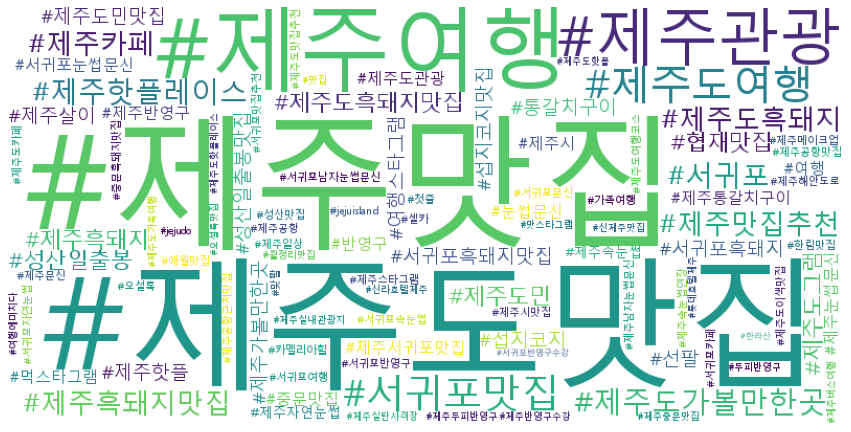

In [27]:
wordcloud = WordCloud(font_path = font_path,
                      background_color="white",
                      max_words=100,
                      relative_scaling= 0.3,
                      width = 800,
                      height = 400
                      ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("data_insta/2_tag-wordcloud.png")